In [36]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fname='elc_output.csv'
colfilter = ['Process','Period','PV']

In [37]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)

procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict={}

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')

In [38]:
print(procs)

['ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG' 'ELCTENUC' 'ELCTEOIL'
 'ELCTEPVS' 'ELCTEWND' 'FTE-DIMECCSG22' 'FTE-DIMELNG17' 'FTE-DIMEPVN17'
 'FTE-DIMESOL17' 'FTE-DIMEWOFX17' 'FTE-DIMEWON17' 'PEMFC22']


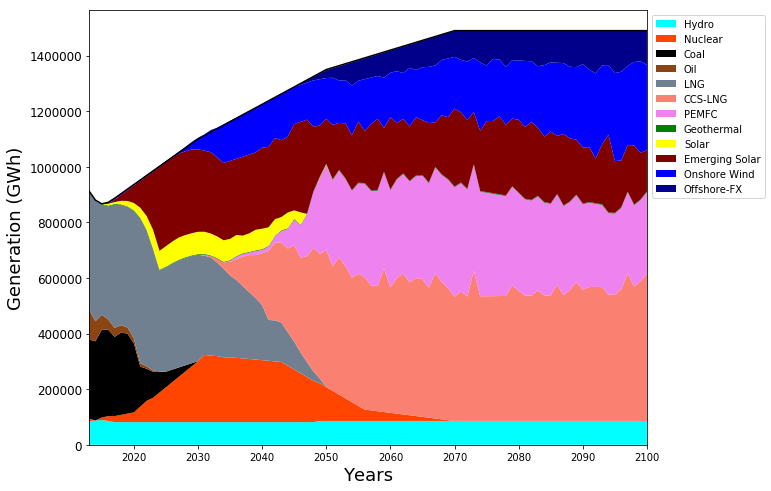

In [40]:
ordlegend=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'CCS-LNG','PEMFC',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore-FX','Offshore-FL',#'Storage',
           #'Storage'#'Steam reforming+CCS','Steam reforming','Electrolysis',
          #'Imports'#,'CCS-USC'
          ]
colours = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'salmon','violet',
           'green','yellow','maroon',
           'blue','darkblue','teal',#'maroon',#'darkturquoise',
          #'darkturquoise'
           #'firebrick'
           #'olive',
          ]
fig, ax = plt.subplots(figsize=(10, 8))
pltyrs=range(2013,2101)
ax.stackplot(pltyrs,  pltdict['ELCTEHYD'],pltdict['ELCTENUC'], 
             pltdict['ELCTECOA'],pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['FTE-DIMELNG17'],
             pltdict['FTE-DIMECCSG22'],pltdict['PEMFC22'],
              pltdict['ELCTEGEO'],pltdict['ELCTEPVS']+pltdict['FTE-DIMEPVN17'],pltdict['FTE-DIMESOL17'],
             pltdict['ELCTEWND']+pltdict['FTE-DIMEWON17'],pltdict['FTE-DIMEWOFX17'],#pltdict['FTE-DIMEWOFL17'],
            #pltdict['FTE-ELCSTG17'],#pltdict['FTE-SRCCSH22'],pltdict['FTE-SRH22'],pltdict['HESYS22'],    
             #pltdict['IMPNRGZ'],#pltdict['USCCCS23'], 
             labels=ordlegend, colors=colours)
dmd=[913791,880396,866861,872251,8.87E+05,1.10E+06,1.35E+06,1.49E+06,1.49E+06]
yr=[2013,2014,2015,2016,2017,2030,2050,2070,2100]
ax.plot(yr,dmd,color='black')
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax.grid()
#plt.xticks(np.arange(2013, 2100+1, 1.0))
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=12)
ax.set_xlim((2013, 2100))
#ax.set_ylim((0, 1000000))
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_xlabel('Years',fontsize='18')
ax.set_ylabel('Generation (GWh)',fontsize='18')
#fig.autofmt_xdate()
fig.savefig('elc_output.png',bbox_inches='tight', dpi=300)

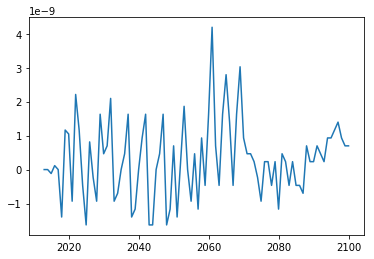

In [41]:
fname='varfin_elc.csv'
colfilter = ['Process','Period','PV']

elcin = pd.read_csv(fname, delimiter=';', usecols = colfilter)
elcin = elcin[colfilter]
elcin=elcin.groupby(['Period']).sum() #sum values for same period, process
elcin=elcin.reset_index()
elcin.set_index('Period', inplace=True)

elcout=a.groupby(['Period']).sum() #sum values for same period, process
#print(elcout)
elcgen=elcout.PV.values
elccon=elcin.PV.values

overgen=elcgen-elccon
plt.plot(pltyrs,overgen)

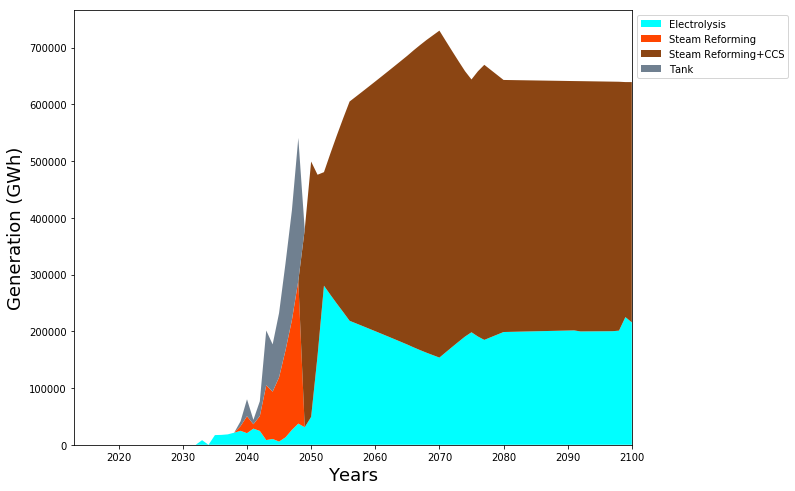

In [52]:
fname='h2_fout.csv'
colfilter = ['Process','Period','PV']

h2df = pd.read_csv(fname, delimiter=';', usecols = colfilter)
h2df = h2df[colfilter]
h2df=h2df.groupby(['Process', 'Period']).sum() #sum values for same period, process
h2df=h2df.reset_index()
h2df.set_index('Period', inplace=True)

procs3 = h2df.Process.unique()
pltdict4={}

for prc in procs3:
    e=h2df.loc[h2df['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=e['PV']
    



ordlegend2=['Electrolysis','Steam Reforming','Steam Reforming+CCS','Tank']
           
colours2 = ['aqua','orangered','saddlebrown', 'slategray']
          
fig2, ax2 = plt.subplots(figsize=(10, 8))
pltyrs2=range(2013,2101)
ax2.stackplot(pltyrs2,  pltdict4['FTE-ELEH22'],pltdict4['FTE-SRH22'], 
             pltdict4['FTE-SRCCSH22'],pltdict4['FTE-SRH22'], 
             labels=ordlegend2, colors=colours2)
ax2.set_xlim((2013, 2100))
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax2.set_xlabel('Years',fontsize='18')
ax2.set_ylabel('Generation (GWh)',fontsize='18')
fig2.savefig('h2_sources.png',bbox_inches='tight', dpi=300)